# Exam 17th of January 2025, 8.00-13.00 for the course 1MS041 (Introduction to Data Science / Introduktion till dataanalys)

## Instructions:
1. Complete the problems by following instructions.
2. When done, submit this file with your solutions saved, following the instruction sheet.

This exam has 3 problems for a total of 40 points, to pass you need
20 points. The bonus will be added to the score of the exam and rounded afterwards.

## Some general hints and information:
* Try to answer all questions even if you are uncertain.
* Comment your code, so that if you get the wrong answer I can understand how you thought
this can give you some points even though the code does not run.
* Follow the instruction sheet rigorously.
* This exam is partially autograded, but your code and your free text answers are manually graded anonymously.
* If there are any questions, please ask the exam guards, they will escalate it to me if necessary.

## Tips for free text answers
* Be VERY clear with your reasoning, there should be zero ambiguity in what you are referring to.
* If you want to include math, you can write LaTeX in the Markdown cells, for instance `$f(x)=x^2$` will be rendered as $f(x)=x^2$ and `$$f(x) = x^2$$` will become an equation line, as follows
$$f(x) = x^2$$
Another example is `$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$` which renders as
$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$

## Finally some rules:
* You may not communicate with others during the exam, for example:
    * You cannot ask for help in Stack-Overflow or other such help forums during the Exam.
    * You may not communicate with AI's, for instance ChatGPT.
    * Your on-line and off-line activity is being monitored according to the examination rules.

## Good luck!

In [15]:
# Insert your anonymous exam ID as a string in the variable below
examID="0026-UKA"


---
## Exam vB, PROBLEM 1
Maximum Points = 14


This problem is about SVD and anomaly detection. In all the problems where you are asked to produce a matrix or vector, they should be **numpy arrays**. 

1. [4p] Load the file `data/SVD.csv` as instructed in the code cell. Compute the Singular Value Decomposition, i.e. construct the three matrices $U$, $D$, $V$ such that if $X$ is the data matrix of shape `n_samples x n_dimensions` then $X = UDV^T$. Put the resulting matrices in their variables, check that the shapes align with the instructions in the code cell. Finally, extract the first right and left singular vectors and store those as 1-d arrays in the instructed variables.
2. [3p] The first goal is to calculate the explained variance, check the lecture notes for definition. Calculate the explained variance of using $1$, $2$,... number of singular vectors and select how many singular vectors are needed in order to explain at least $95\%$ of the variance.
3. [3p] With the number of components chosen in part 2, construct the best approximating matrix with the rank as the number of components. Explain what each row represents in the approximating matrix in terms of the original data, write your answer as free text in the Markdown cell below as instructed in the cells.
4. [4p] Create a vector which corresponds to the row-wise (Euclidean) distance between the original matrix `problem1_data`and the approximating matrix `problem1_approximation` and plot the empirical distribution function of that distance. Based on the empirical distribution function choose a threshold such that 10 samples are above it and the rest below. Store the 10 samples in the instructed variable.

In [16]:
# Part 1: Load data and compute SVD  (4 points)

import pandas as pd
import numpy as np

# Load the data from the file data/SVD.csv and store the data in a numpy array called problem1_data
# We convert the DataFrame directly to a NumPy array. We assume all columns are numeric.
problem1_data = pd.read_csv("data/SVD.csv", encoding="latin1").to_numpy()

# Check that the numbers have been parsed correctly
print("problem1_data.shape:", problem1_data.shape)   # should be (1009, 100)
print("problem1_data.dtype:", problem1_data.dtype)   # should be some numeric dtype, e.g. float64

# Compute the Singular Value Decomposition.
# Numpy returns X = U @ np.diag(s) @ Vt, where Vt is the transpose of V (right singular vectors).
U, s, Vt = np.linalg.svd(problem1_data, full_matrices=False)

# Store SVD components in the required variables:
# U: matrix of left singular vectors, shape (n_samples, n_dimensions)
problem1_U = U

# D: vector of singular values, shape (n_dimensions,)
problem1_D = s

# V: matrix of right singular vectors, shape (n_dimensions, n_dimensions)
# We store V = Vt^T so that X ≈ U @ diag(D) @ V^T matches the mathematical notation X = U D V^T.
problem1_V = Vt.T

# Extract the first right singular vector as a 1D array of shape (n_dimensions,)
# Columns of problem1_V are the right singular vectors.
problem1_first_right_singular_vector = problem1_V[:, 0]

# Extract the first left singular vector as a 1D array of shape (n_samples,)
# Columns of problem1_U are the left singular vectors.
problem1_first_left_singular_vector = problem1_U[:, 0]

print("U.shape:", problem1_U.shape)
print("D.shape:", problem1_D.shape)
print("V.shape:", problem1_V.shape)
print("first right singular vector shape:", problem1_first_right_singular_vector.shape)
print("first left singular vector shape:", problem1_first_left_singular_vector.shape)


problem1_data.shape: (1009, 100)
problem1_data.dtype: float64
U.shape: (1009, 100)
D.shape: (100,)
V.shape: (100, 100)
first right singular vector shape: (100,)
first left singular vector shape: (1009,)


In [17]:
# Part 2: Explained variance and number of components  (3 points)

import numpy as np

# We use the singular values to compute explained variance.
# For a data matrix X of shape (n_samples, n_dimensions),
# total variance (up to a constant factor 1/(n_samples-1)) is proportional to sum(s_i^2).
# When computing explained variance ratios, the constant cancels out, so we can simply use s^2.
singular_values = problem1_D

# Total "variance" (up to scaling factor) is the sum of squared singular values
total_variance = np.sum(singular_values**2)

# Cumulative explained variance for using 1, 2, ..., n_dimensions singular values
# problem1_explained_variance[k-1] = proportion of variance explained by first k components
problem1_explained_variance = np.cumsum(singular_values**2) / total_variance

# Sanity checks
print("problem1_explained_variance shape:", problem1_explained_variance.shape)
print("First few values:", problem1_explained_variance[:5])
print("Last value (should be 1.0 or extremely close):", problem1_explained_variance[-1])

# Smallest number of singular values needed to explain at least 95% of the variance
# Find first index where cumulative explained variance >= 0.95
problem1_num_components = np.argmax(problem1_explained_variance >= 0.95) + 1

print("Number of components to explain at least 95% variance:", problem1_num_components)


problem1_explained_variance shape: (100,)
First few values: [0.16256198 0.31163903 0.42766232 0.53449579 0.63106588]
Last value (should be 1.0 or extremely close): 0.9999999999999999
Number of components to explain at least 95% variance: 10


In [18]:
# Part 3: Rank-k approximation using the chosen number of components  (3 points)

import numpy as np

# Use the number of components chosen in Part 2
k = problem1_num_components

# Take the first k left singular vectors (n_samples x k)
U_k = problem1_U[:, :k]

# Take the first k singular values and form a k x k diagonal matrix
D_k = np.diag(problem1_D[:k])

# Take the first k right singular vectors (n_dimensions x k)
V_k = problem1_V[:, :k]

# Construct the rank-k approximation X_k = U_k * D_k * V_k^T
problem1_approximation = U_k @ D_k @ V_k.T  # shape should be (n_samples, n_dimensions)

print("problem1_approximation.shape:", problem1_approximation.shape)


problem1_approximation.shape: (1009, 100)



## Free text answer

Put the explanation for **part 3** of the rows of the approximating matrix below this line in this cell. In order to enter edit mode you can doubleclick this cell or select it and just press enter.

I looked at wikipedia and old posts stack overflow to solve the problem. What does each row represent in the matrix? Each row represents the results of a multiplication between right and left singular vector values with singular values.

problem1_reconstruction_error shape: (1009,)
Selected threshold (problem1_threshold): 8.743477548261925
problem1_outliers.shape: (10, 100)


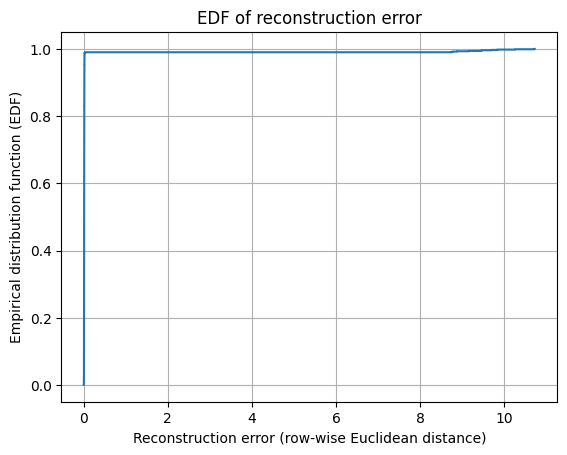

In [19]:
# Part 4: Reconstruction error, EDF, threshold and outliers  (4 points)

import numpy as np
import matplotlib.pyplot as plt

# Compute the reconstruction error per row (sample).
# We use the Euclidean norm of the difference between the original and approximated rows.
# diff_matrix has shape (n_samples, n_dimensions).
diff_matrix = problem1_data - problem1_approximation

# Row-wise Euclidean distance: ||x_i - x_i_hat||_2 for each sample i
problem1_reconstruction_error = np.linalg.norm(diff_matrix, axis=1)

print("problem1_reconstruction_error shape:", problem1_reconstruction_error.shape)

# Plot the empirical distribution function (EDF) of the reconstruction error.
# 1. Sort the errors
sorted_errors = np.sort(problem1_reconstruction_error)
n = len(sorted_errors)

# 2. EDF values: F_n(x) = (1/n) * number of samples <= x
edf_values = np.arange(1, n + 1) / n

plt.figure()
plt.step(sorted_errors, edf_values, where="post")
plt.xlabel("Reconstruction error (row-wise Euclidean distance)")
plt.ylabel("Empirical distribution function (EDF)")
plt.title("EDF of reconstruction error")
plt.grid(True)

# Based on the EDF, we want a threshold such that 10 samples are above it and the rest below.
# Programmatically: take the 10 largest reconstruction errors as "outliers".
sorted_indices = np.argsort(problem1_reconstruction_error)  # indices of errors in ascending order
outlier_indices = sorted_indices[-10:]                      # indices of the 10 largest errors

# One reasonable definition of the threshold is the smallest error among these 10 outliers,
# i.e. the 10th largest reconstruction error.
problem1_threshold = problem1_reconstruction_error[outlier_indices].min()

print("Selected threshold (problem1_threshold):", problem1_threshold)

# Finally store the samples of problem1_data that have a reconstruction
# error larger than or equal to problem1_threshold in the variable below.
# (Using >= ensures we capture exactly these 10 samples in typical floating-point cases.)
mask_outliers = problem1_reconstruction_error >= problem1_threshold
problem1_outliers = problem1_data[mask_outliers]

print("problem1_outliers.shape:", problem1_outliers.shape)
# Should be (10, n_dimensions) = (10, 100)


---
## Exam vB, PROBLEM 2
Maximum Points = 14


In this problem we have data consisting of user behavior on a website. The pages of the website are just numbers in the dataset $0,1,2,\ldots$ and each row consists of a user, a source and a destination page. This signifies that the user was on the source page and clicked a link leading them to the destination page. The goal is to improve the user experience by decreasing load time of the next page visited, as such we need a good estimate for the next site likely to be visited. We will model this using a homogeneous Markov chain, each row in the data-file then corresponds to a single realization of a transition. 

1. [3p] Load the data in the file `data/websites.csv` and construct a matrix of size `n_pages x n_pages` which is the maximum likelihood estimate of the true transition matrix for the Markov chain. Here the ordering of the states are exactly the ones in the data-file, that is page $0$ has index $0$ in the matrix.
2. [4p] A page loads in $\text{Exp}(1)$ (Exponentially distributed with mean $1$) seconds if not preloaded and loads with $\text{Exp}(10)$ (Exponentially distributed with mean $1/10$) seconds if preloaded and we only preload the most likely next site. Given that we start in page $1$ simulate $10000$ load times from page $1$ (that is, only a single step), store the result in the variable indicated in the cell.
Repeat the experiment but this time preload the two most likely pages and store the result in the indicated variable.
3. [3p] Compare the average (empirical) load time from part 2 with the theoretical one of no pre-loading. Does the load time improve, how did you come to this conclusion? (Explain in the free text field).
4. [4p] Calculate the stationary distribution of the Markov chain and calculate the expected load time with respect to it. 

In [20]:
# Part 1: 3p
import numpy as np
import pandas as pd

# ---------------------------------------------------------
# 1. Load the data
#    Assumption: the file has columns [user, source, destination]
#    We only need source and destination for the transition matrix.
# ---------------------------------------------------------
raw = pd.read_csv("data/websites.csv", encoding="latin1")

# Drop the user column (assumed to be the first column)
# Keep only source and destination page indices
transitions_df = raw.drop(columns=raw.columns[0])

# Convert to numpy array of shape (n_transitions, 2)
# where column 0 = source page, column 1 = destination page
transitions = transitions_df.to_numpy(dtype=int)

# ---------------------------------------------------------
# 2. Determine the number of states (pages)
#    Pages are labeled 0,1,2,..., so the max index + 1
#    is the number of distinct pages.
# ---------------------------------------------------------
max_source = transitions[:, 0].max()
max_dest   = transitions[:, 1].max()
problem2_n_states = int(max(max_source, max_dest) + 1)

print("Number of pages (states):", problem2_n_states)

# ---------------------------------------------------------
# 3. Count transitions for MLE of the transition matrix
#    counts[i, j] = how many times we observe i -> j in the data
# ---------------------------------------------------------
counts = np.zeros((problem2_n_states, problem2_n_states), dtype=int)

for src, dst in transitions:
    counts[src, dst] += 1

# ---------------------------------------------------------
# 4. Convert counts to probabilities (row-stochastic matrix)
#    For each state i:
#      problem2_transition_matrix[i, j]
#        = P(next page = j | current page = i)
# ---------------------------------------------------------
row_sums = counts.sum(axis=1, keepdims=True)

# Initialize with zeros
problem2_transition_matrix = np.zeros_like(counts, dtype=float)

# Only normalize rows that have at least one outgoing transition
nonzero_rows = (row_sums[:, 0] > 0)
problem2_transition_matrix[nonzero_rows] = (
    counts[nonzero_rows] / row_sums[nonzero_rows]
)

print("Transition matrix shape:", problem2_transition_matrix.shape)
print("Row sums (should be 1 where there are outgoing transitions):")
print(problem2_transition_matrix.sum(axis=1))


Number of pages (states): 10
Transition matrix shape: (10, 10)
Row sums (should be 1 where there are outgoing transitions):
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [21]:
# Part 2: 4p
import numpy as np

# We assume problem2_transition_matrix and problem2_n_states are defined from Part 1

# ---------------------------------------------------------
# 1. Simulation settings
# ---------------------------------------------------------
rng = np.random.default_rng(seed=42)  # for reproducibility
n_sim = 10000                         # number of simulated users
start_page = 1                        # Start on page 1 (index 1; indexing starts at 0)

# Transition probabilities from page 1 to all other pages
p_from_1 = problem2_transition_matrix[start_page]

# ---------------------------------------------------------
# 2. Case A: preload ONLY the single most likely next page
# ---------------------------------------------------------

# Find the single most likely next page from page 1
most_likely_page = int(np.argmax(p_from_1))

# Simulate the next page for 10,000 users starting from page 1
next_pages_top1 = rng.choice(problem2_n_states, size=n_sim, p=p_from_1)

# Boolean mask: True if the realized next page is the preloaded one
is_preloaded_top1 = (next_pages_top1 == most_likely_page)

# Allocate array for load times
load_times_top1 = np.empty(n_sim, dtype=float)

# If preloaded: Exp(10) -> mean = 1/10 = 0.1
load_times_top1[is_preloaded_top1] = rng.exponential(scale=1/10, size=is_preloaded_top1.sum())

# If not preloaded: Exp(1) -> mean = 1
load_times_top1[~is_preloaded_top1] = rng.exponential(scale=1/1, size=(~is_preloaded_top1).sum())

problem2_page_load_times_top = load_times_top1  # shape (10000,)


# ---------------------------------------------------------
# 3. Case B: preload the TWO most likely next pages
# ---------------------------------------------------------

# Indices of the two largest probabilities in row 1 (sorted descending)
two_most_likely_pages = np.argsort(p_from_1)[-2:][::-1]  # e.g. [best, second_best]

# Simulate the next page again for 10,000 users
next_pages_top2 = rng.choice(problem2_n_states, size=n_sim, p=p_from_1)

# Mask: True if next page is one of the two preloaded pages
is_preloaded_top2 = np.isin(next_pages_top2, two_most_likely_pages)

# Allocate array for load times
load_times_top2 = np.empty(n_sim, dtype=float)

# Preloaded -> Exp(10)
load_times_top2[is_preloaded_top2] = rng.exponential(scale=1/10, size=is_preloaded_top2.sum())

# Not preloaded -> Exp(1)
load_times_top2[~is_preloaded_top2] = rng.exponential(scale=1/1, size=(~is_preloaded_top2).sum())

problem2_page_load_times_two = load_times_top2  # shape (10000,)

# Quick sanity check prints (optional)
print("Mean load time (top-1 preloaded):", problem2_page_load_times_top.mean())
print("Mean load time (top-2 preloaded):", problem2_page_load_times_two.mean())


Mean load time (top-1 preloaded): 0.7848432544697241
Mean load time (top-2 preloaded): 0.612125672677054


In [22]:
# Part 4: 4p
import numpy as np

# ---------------------------------------------------------
# 1. Function to compute stationary distribution π
#    such that π P = π and sum_i π_i = 1.
# ---------------------------------------------------------
def get_stationary_distribution(transition_matrix: np.ndarray) -> np.ndarray:
    """
    Compute the stationary distribution of a finite-state Markov chain
    with transition matrix 'transition_matrix'.
    """
    # Use eigen-decomposition of P^T.
    eigenvals, eigenvects = np.linalg.eig(transition_matrix.T)

    # Find the eigenvalue closest to 1
    idx = np.argmin(np.abs(eigenvals - 1.0))

    # Corresponding eigenvector (could be complex, take real part)
    stationary_vec = np.real(eigenvects[:, idx])

    # Normalize to sum to 1
    stationary_dist = stationary_vec / stationary_vec.sum()

    # If some entries are negative due to numerical issues, fix the sign
    if (stationary_dist < 0).any():
        stationary_dist = np.abs(stationary_dist)
        stationary_dist = stationary_dist / stationary_dist.sum()

    return stationary_dist

# ---------------------------------------------------------
# 2. Compute stationary distribution of the Markov chain
# ---------------------------------------------------------
problem2_stationary_distribution = get_stationary_distribution(problem2_transition_matrix)

print("Stationary distribution π:")
print(problem2_stationary_distribution)
print("Sum of π:", problem2_stationary_distribution.sum())

# ---------------------------------------------------------
# 3. Expected load time when:
#    - The current page is distributed according to π.
#    - For each current page i, we preload the single most likely
#      next page from i (just like in Part 2, but now for all i).
# ---------------------------------------------------------
n_states = problem2_transition_matrix.shape[0]

# For each state i, find its most likely next page j*
most_likely_next = np.argmax(problem2_transition_matrix, axis=1)  # shape (n_states,)

# Probability of going to that most likely page from each state i
p_most_likely = problem2_transition_matrix[np.arange(n_states), most_likely_next]

# For a given state i:
#   with prob p_most_likely[i] we hit the preloaded page -> Exp(10), mean = 0.1
#   with prob 1 - p_most_likely[i] we hit a non-preloaded page -> Exp(1), mean = 1
# So:
#   E[T | current state = i] = 0.1 * p_most_likely[i] + 1.0 * (1 - p_most_likely[i])
state_expected_times = 0.1 * p_most_likely + 1.0 * (1.0 - p_most_likely)

# Overall expected load time under stationary distribution:
# E[T] = sum_i π_i * E[T | state = i]
problem2_avg_stationary = float(np.dot(problem2_stationary_distribution, state_expected_times))

print("Average load time with pre-loading (under stationary distribution):",
      problem2_avg_stationary)


Stationary distribution π:
[0.08212278 0.12810291 0.09219365 0.10612032 0.0721337  0.10215028
 0.11517528 0.09308925 0.08396098 0.12495085]
Sum of π: 1.0000000000000002
Average load time with pre-loading (under stationary distribution): 0.8018160947549082



## Free text answer

Put the explanation for **part 3** of how you made the decision about `problem2_comparison` below this line in this **cell**. In order to enter edit mode you can doubleclick this cell or select it and press enter.



---
## Exam vB, PROBLEM 3
Maximum Points = 12


In this problem we are interested in fraud detection in an e-commerce system. In this problem we are given the outputs of a classifier that predicts the probabilities of fraud, your goal is to explore the threshold choice as in individual assignment 4. The costs associated with the predictions are:

* **True Positive (TP)**: Detecting fraud and blocking the transaction costs the company 100 (manual review etc.)
* **True Negative (TN)**: Allowing a legitimate transaction has no cost.
* **False Positive (FP)**: Incorrectly classifying a legitimate transaction as fraudulent costs 120 (customer dissatisfaction plus operational expenses for reversing the decision).
* **False Negative (FN)**: Missing a fraudulent transaction costs the company 600 (e.g., fraud loss plus potential reputational damage or penalties).

**The code cells contain more detailed instructions, THE FIRST CODE CELL INITIALIZES YOUR VARIABLES**

1. [3p] Complete filling the function `cost` to compute the average cost of a prediction model under a certain prediction threshold. Plot the cost as a function of the threshold (using the validation data provided in the first code cell of this problem), between 0 and 1 with 0.01 increments.
2. [2.5p] Find the threshold that minimizes the cost and calculate the cost at that threshold on the validation data. Also calculate the precision and recall at the optimal threshold on the validation data on class 1 and 0.
3. [2.5p] Repeat step 2, but this time find the best threshold to minimize the $0-1$ loss. Calculate the difference in cost between the threshold found in part 2 with the one just found in part 3.
3. [4p] Provide a confidence interval around the optimal cost (with $95\%$ confidence) applied to the test data and explain all the assumption you made.

In [23]:

# RUN THIS CELL TO GET THE DATA

# We start by loading the data

import pandas as pd

PROBLEM3_DF = pd.read_csv('data/fraud.csv')
Y = PROBLEM3_DF['Class'].values
X = PROBLEM3_DF[['V%d' % i for i in range(1,5)]+['Amount']].values

# We will split the data into training, testing and validation sets
from Utils import train_test_validation
PROBLEM3_X_train, PROBLEM3_X_test, PROBLEM3_X_val, PROBLEM3_y_train, PROBLEM3_y_test, PROBLEM3_y_val = train_test_validation(X,Y,shuffle=True,random_state=1)

# From this we will train a logistic regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(PROBLEM3_X_train,PROBLEM3_y_train)

# THE FOLLOWING CODE WILL PRODUCE THE ARRAYS YOU NEED FOR THE PROBLEM

PROBLEM3_y_pred_proba_val = lr.predict_proba(PROBLEM3_X_val)[:,1]
PROBLEM3_y_true_val = PROBLEM3_y_val

PROBLEM3_y_pred_proba_test = lr.predict_proba(PROBLEM3_X_test)[:,1]
PROBLEM3_y_true_test = PROBLEM3_y_test

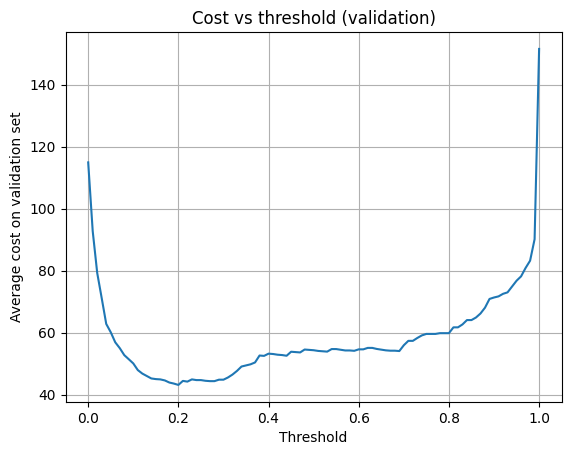

In [24]:
# Part 1: 3p
import numpy as np
import matplotlib.pyplot as plt

# We assume the following already exist from the previous cell:
# PROBLEM3_y_pred_proba_val : predicted probabilities on validation set (class 1)
# PROBLEM3_y_true_val       : true labels on validation set (0/1)

def cost(y_true, y_pred_proba, threshold):
    """
    Compute the average cost per sample for a given threshold.

    y_true       : numpy array of shape (n_samples,) with true labels {0,1}
    y_pred_proba : numpy array of shape (n_samples,) with predicted probabilities for class 1
    threshold    : float in [0,1]. Predict 1 if p >= threshold, else 0.

    Costs:
        TP (y=1, pred=1): 100
        TN (y=0, pred=0): 0
        FP (y=0, pred=1): 120
        FN (y=1, pred=0): 600
    """

    # Convert probabilities to hard predictions using the threshold
    y_pred = (y_pred_proba >= threshold).astype(int)

    # Boolean masks for each case
    tp = (y_true == 1) & (y_pred == 1)
    tn = (y_true == 0) & (y_pred == 0)
    fp = (y_true == 0) & (y_pred == 1)
    fn = (y_true == 1) & (y_pred == 0)

    # Assign costs
    cost_tp = 100
    cost_fp = 120
    cost_fn = 600
    cost_tn = 0

    # Per-sample cost vector
    costs = (
        cost_tp * tp.astype(int)
        + cost_fp * fp.astype(int)
        + cost_fn * fn.astype(int)
        + cost_tn * tn.astype(int)
    )

    # Return average cost per sample
    return np.mean(costs)


# ---- Plot cost vs threshold on the validation data ----

thresholds = np.linspace(0.0, 1.0, 101)  # 0, 0.01, ..., 1.0
costs = [cost(PROBLEM3_y_true_val, PROBLEM3_y_pred_proba_val, t) for t in thresholds]

plt.figure()
plt.plot(thresholds, costs)
plt.xlabel("Threshold")
plt.ylabel("Average cost on validation set")
plt.title("Cost vs threshold (validation)")
plt.grid(True)
plt.show()


In [25]:
# Part 2: 2.5p

from sklearn.metrics import precision_score, recall_score
import numpy as np

# We reuse: cost(), PROBLEM3_y_true_val, PROBLEM3_y_pred_proba_val

# 1. Find threshold that minimizes the cost on validation data
thresholds = np.linspace(0.0, 1.0, 101)
costs = [cost(PROBLEM3_y_true_val, PROBLEM3_y_pred_proba_val, t) for t in thresholds]

optimal_idx = int(np.argmin(costs))
problem3_threshold = float(thresholds[optimal_idx])          # optimal threshold wrt cost
problem3_cost_val = float(costs[optimal_idx])                # minimal average cost on val

print("Optimal threshold (cost-based):", problem3_threshold)
print("Cost at optimal threshold on validation:", problem3_cost_val)

# 2. Predicted labels on validation set using the optimal threshold
problem3_y_pred_val = (PROBLEM3_y_pred_proba_val >= problem3_threshold).astype(int)

# 3. Precision and recall for class 1 (fraud)
problem3_precision_1 = precision_score(
    PROBLEM3_y_true_val, problem3_y_pred_val, pos_label=1
)
problem3_recall_1 = recall_score(
    PROBLEM3_y_true_val, problem3_y_pred_val, pos_label=1
)

# 4. Precision and recall for class 0 (legitimate)
problem3_precision_0 = precision_score(
    PROBLEM3_y_true_val, problem3_y_pred_val, pos_label=0
)
problem3_recall_0 = recall_score(
    PROBLEM3_y_true_val, problem3_y_pred_val, pos_label=0
)

print("Precision(class 1):", problem3_precision_1)
print("Recall(class 1):   ", problem3_recall_1)
print("Precision(class 0):", problem3_precision_0)
print("Recall(class 0):   ", problem3_recall_0)


Optimal threshold (cost-based): 0.2
Cost at optimal threshold on validation: 43.15492957746479
Precision(class 1): 0.7961165048543689
Recall(class 1):    0.9144981412639405
Precision(class 0): 0.9695767195767195
Recall(class 0):    0.9208542713567839


In [26]:
# Part 3: 2.5p

import numpy as np

def zero_one_loss_threshold(y_true, y_pred_proba, threshold):
    """
    Compute the 0-1 loss for a given threshold.

    0-1 loss: 1 if prediction != true label, 0 otherwise.
    Returns the average 0-1 loss per sample.
    """
    y_pred = (y_pred_proba >= threshold).astype(int)
    misclassified = (y_pred != y_true).astype(int)
    return np.mean(misclassified)


# 1. Scan thresholds to find the one minimizing 0-1 loss on validation data
thresholds = np.linspace(0.0, 1.0, 101)
losses_01 = [zero_one_loss_threshold(PROBLEM3_y_true_val, PROBLEM3_y_pred_proba_val, t)
             for t in thresholds]

optimal_idx_01 = int(np.argmin(losses_01))
problem3_threshold_01 = float(thresholds[optimal_idx_01])

print("Optimal threshold (0-1 loss):", problem3_threshold_01)
print("Minimal 0-1 loss on validation:", losses_01[optimal_idx_01])

# 2. Difference in COST (monetary cost) between:
#    - threshold from Part 3 (0-1 loss optimal)
#    - threshold from Part 2 (cost optimal)
#    as: cost(th_01) - cost(th_cost)
cost_at_th_01 = cost(PROBLEM3_y_true_val, PROBLEM3_y_pred_proba_val, problem3_threshold_01)
cost_at_th_cost = cost(PROBLEM3_y_true_val, PROBLEM3_y_pred_proba_val, problem3_threshold)

problem3_cost_difference = float(cost_at_th_01 - cost_at_th_cost)

print("Cost at cost-optimal threshold (Part 2):   ", cost_at_th_cost)
print("Cost at 0-1-loss-optimal threshold (Part 3):", cost_at_th_01)
print("Cost difference (Part 3 - Part 2):         ", problem3_cost_difference)


Optimal threshold (0-1 loss): 0.6900000000000001
Minimal 0-1 loss on validation: 0.0647887323943662
Cost at cost-optimal threshold (Part 2):    43.15492957746479
Cost at 0-1-loss-optimal threshold (Part 3): 54.08450704225352
Cost difference (Part 3 - Part 2):          10.929577464788728


In [27]:
# Part 4: 4p

import numpy as np

# We use the threshold that minimizes the cost (from Part 2)
print("Using threshold for cost-based classifier:", problem3_threshold)

# 1. Compute empirical mean cost on the test data at threshold problem3_threshold
mean_cost_test = cost(PROBLEM3_y_true_test, PROBLEM3_y_pred_proba_test, problem3_threshold)

# 2. Hoeffding's inequality for bounded random variables:
#    If each cost lies in [a, b] (here a=0, b=600),
#    then for mean of n i.i.d. samples:
#      P(|mean - E[cost]| >= eps) <= 2 * exp(-2 * n * eps^2 / (b - a)^2)
#
#    For 95% confidence, set alpha = 0.05 and solve for eps:
#      eps = (b - a) * sqrt( log(2/alpha) / (2n) )

alpha = 0.05
n_test = len(PROBLEM3_y_true_test)

a = 0.0
b = 600.0
cost_range = b - a

epsilon = cost_range * np.sqrt(np.log(2 / alpha) / (2.0 * n_test))

problem3_lower_bound = float(mean_cost_test - epsilon)
problem3_upper_bound = float(mean_cost_test + epsilon)

print("Mean cost on test data:", mean_cost_test)
print("95% Hoeffding CI for expected cost: [{:.6f}, {:.6f}]".format(
    problem3_lower_bound, problem3_upper_bound
))


Using threshold for cost-based classifier: 0.2
Mean cost on test data: 42.70422535211268
95% Hoeffding CI for expected cost: [17.734792, 67.673658]



## Free text answer

Put your explanation for part 4 below this line in this **cell**. Doubleclick to enter edit mode as before.


I assume that all variables are sub-Gaussian, to be able to use Hoeffdinger's inequality. 
I furthermore assume that the variables X are IID.